# Term Project

### Group 7
#### Bolat Arystanov (30134100) - Fluid Model
#### Akramullah Basha Mohammed Khaliq Basha (30135394) - Flow Model

## Introduction
### First, oil and gas properties predicted using two-phase correlations, and the all functions and models was tested and reviewed.  Then, creating flow correlation functions combining with fluid model, we evaluated the liquid hold-up and friction factor. Finally, Pressure traverse function tested with given parameters along with defining total pressure gradient

In [30]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Fluid Model
# 2.0 Gas Properties

### 2.1 The Ppc and Tpc of Natural Gas
### 2.2 Gas Compressibility Factor

#####  these correlations are valued for 0.57<gamma_G<1.68, with CO2<12%mole, N2<3%mole, and no H2S.


In [31]:
# Pseudo Critical Temperature
def temp_crit(gamma_gas):
    value_temp_crit = 169.2 + 349.5 * gamma_gas - 74 * (gamma_gas * gamma_gas)
    return value_temp_crit

# Pseudo Critical Pressure
def pres_crit(gamma_gas):
    value_pres_crit = 756.8 - 131 * gamma_gas - 3.6 * (gamma_gas * gamma_gas)
    return value_pres_crit

# Gas Compressibility Factor (Z-Factor)
def z_factor(temp_ave, pres_ave, gamma_gas):
    Tpr = (temp_ave+459.69)/temp_crit(gamma_gas)
    Ppr = pres_ave/pres_crit(gamma_gas)
    A = 1.39 * (Tpr - 0.92) ** 0.5 - 0.36 * Tpr - 0.101
    B = Ppr * (0.62 - 0.23 * Tpr) + (0.066 / (Tpr - 0.86) - 0.037) * (Ppr ** 2) + 0.32 * Ppr ** 6 / (10 ** (9 * (Tpr - 1)))
    C = 0.132 - (0.32 * (math.log10(Tpr)))
    D = 10 ** (0.3106 - 0.49 * Tpr + 0.1824 * (Tpr ** 2))
    value_z_factor = A + (1 - A) * math.exp(-B) + C * Ppr ** D
    return value_z_factor

### 2.3 Gas Molecular Weight, Density, and Formation Volume Factor
### 2.4 Gas Viscosity

In [32]:
## T in Fahrenheit, P in psia, gas FVF in bbl/cu.ft, gas viscosity in cP

# Gas Formation Volume Factor
def fvf_gas(temp_ave, pres_ave, gamma_gas):
    value_fvf_gas = 0.028269 * z_factor(temp_ave, pres_ave, gamma_gas) * (temp_ave+459.69) / pres_ave
    return value_fvf_gas

# Gas Viscosity (Molecular weight and density)
def visc_gas(temp_ave, pres_ave, gamma_gas):
    mw_gas = 28.964 * gamma_gas
    dens_gas = 2.6988 * pres_ave * gamma_gas / (temp_ave * z_factor(temp_ave, pres_ave, gamma_gas))
    K = ((9.379 + 0.01607 * mw_gas) * ((temp_ave+459.69) ** 1.5)) / (209.2 + 19.26 * mw_gas + (temp_ave+459.69))
    X = 3.448 + (986.4 / (temp_ave+459.69)) + 0.01009 * mw_gas
    Y = 2.447 - 0.2224 * X
    value_visc_gas = (10 ** (-4)) * K * math.exp(X * ((dens_gas/62.37) ** Y))
    return value_visc_gas

### Test functions for gas properties
Plot z-factor, gas FVF, and gas viscosity for the specific gas gravity of 0.861 at T=236.87 degree Farenheight when Pressure changes from 400 to 1996 psia.

    pressure (psia)  z factor
0               400  0.962905
1               430  0.960040
2               460  0.957175
3               490  0.954311
4               520  0.951451
5               550  0.948596
6               580  0.945749
7               610  0.942912
8               640  0.940086
9               670  0.937274
10              700  0.934477
11              730  0.931698
12              760  0.928938
13              790  0.926199
14              820  0.923483
15              850  0.920791
16              880  0.918126
17              910  0.915489
18              940  0.912881
19              970  0.910304
20             1000  0.907760
21             1030  0.905250
22             1060  0.902775
23             1090  0.900337
24             1120  0.897938
25             1150  0.895578
26             1180  0.893259
27             1210  0.890981
28             1240  0.888747
29             1270  0.886557
30             1300  0.884412
31             1330  0.882314
32        

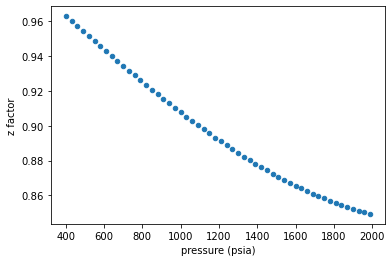

    pressure (psia)  Gas FVF (ft3/SCF)
0               400           0.047402
1               430           0.043963
2               460           0.040973
3               490           0.038350
4               520           0.036029
5               550           0.033962
6               580           0.032108
7               610           0.030438
8               640           0.028924
9               670           0.027546
10              700           0.026287
11              730           0.025132
12              760           0.024068
13              790           0.023086
14              820           0.022176
15              850           0.021331
16              880           0.020544
17              910           0.019810
18              940           0.019123
19              970           0.018479
20             1000           0.017875
21             1030           0.017306
22             1060           0.016770
23             1090           0.016265
24             1120      

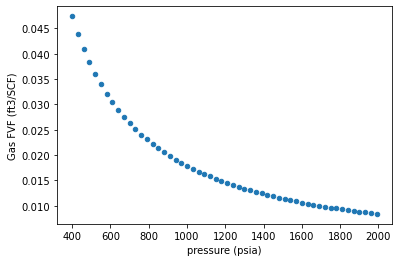

    pressure (psia)  Gas viscosity (cP)
0               400            0.014977
1               430            0.015201
2               460            0.015436
3               490            0.015681
4               520            0.015937
5               550            0.016203
6               580            0.016480
7               610            0.016768
8               640            0.017068
9               670            0.017380
10              700            0.017705
11              730            0.018042
12              760            0.018392
13              790            0.018755
14              820            0.019133
15              850            0.019525
16              880            0.019932
17              910            0.020354
18              940            0.020792
19              970            0.021247
20             1000            0.021719
21             1030            0.022208
22             1060            0.022716
23             1090            0.023243


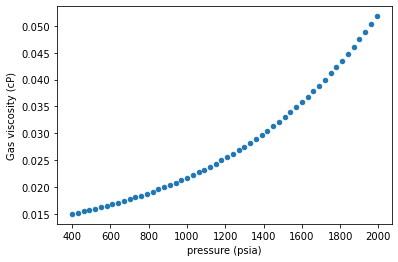

In [33]:
#input data
gamma_gas=0.861
y1_zfactor=list()
y2_fvf=list()
y3_visc=list()
x_pressure=list()
temp_ave=236.87
for p in range(400,1996,30):
    pres_ave = p
    z_factor_value=z_factor(temp_ave,pres_ave,gamma_gas)
    GFVF_value=fvf_gas(temp_ave,pres_ave,gamma_gas)
    GVISC_value=visc_gas(temp_ave,pres_ave,gamma_gas)
    y1_zfactor.append(z_factor_value)
    y2_fvf.append(GFVF_value)
    y3_visc.append(GVISC_value)
    x_pressure.append(p)

data_zfactor = {
      "pressure (psia)": x_pressure,
      "z factor":y1_zfactor
    }

df_zfact = pd.DataFrame(data_zfactor)

print(df_zfact)
df_zfact.plot(kind='scatter',x='pressure (psia)',y='z factor')
plt.show()

data_gfvf = {
      "pressure (psia)": x_pressure,
      "Gas FVF (ft3/SCF)":y2_fvf
    }

df_gfvf = pd.DataFrame(data_gfvf)

print(df_gfvf)
df_gfvf.plot(kind='scatter',x='pressure (psia)',y='Gas FVF (ft3/SCF)')
plt.show()

data_gvisc = {
      "pressure (psia)": x_pressure,
      "Gas viscosity (cP)":y3_visc
    }

df_gvisc = pd.DataFrame(data_gvisc)

print(df_gvisc)
df_gvisc.plot(kind='scatter',x='pressure (psia)',y='Gas viscosity (cP)')
plt.show()


# 3.0 Oil Properties

### 3.1 Solution Gas-Oil Ratio

In [34]:
def gor_solution(pres_ave, temp_ave, api_oil):
    A_gor = 0.0125 * api_oil - 0.00091 * temp_ave
    value_gor_solution = gamma_gas * (((pres_ave / 18.2) + 1.4) * 10 ** A_gor) ** 1.2048
    return value_gor_solution

### 3.2 Oil Formation Factor (for satureted oil P > Pb)

In [35]:
def fvf_oil(temp_ave, gamma_gas, gamma_oil):
    F = gor_solution(pres_ave, temp_ave, api_oil) * ((gamma_gas/gamma_oil) ** 0.5) + 1.25 * temp_ave
    value_fvf_oil = 0.972 + 0.000147 * F ** 1.175
    return value_fvf_oil

### 3.3 Oil Density

In [36]:
def dens_oil(gamma_gas, gamma_oil):
    value_dens_oil = (350 * gamma_oil + 0.0764 * gamma_gas * gor_solution(pres_ave, temp_ave, api_oil)) / (5.615 * fvf_oil(temp_ave, gamma_gas, gamma_oil))
    return value_dens_oil

### 3.4 Gas - Oil Interfacial tension

#### Average temperature is 236.87 F, so we will use correlation for T > 100 F

In [37]:
def ift_og(pres_ave, api_oil):
    ift_og_100 = 37.5 - 0.2571 * api_oil
    value_ift_og = (1 - 0.024 * pres_ave ** 0.45) * ift_og_100
    return value_ift_og

### 3.5 Oil Viscosity (Model A: Petrosky and Farshad)

In [38]:
# Saturated Oil Viscosity (Dead oil viscosity is calculated first)
def visc_oil(temp_ave, api_oil):
    c_vis = 2.3511 * (10 ** 7) * temp_ave ** (-2.10255)
    d_vis = 4.59388 * math.log10(temp_ave) - 22.82792
    visc_oil_dead = c_vis * (math.log10(api_oil)) ** d_vis
    A_vis = 0.1651 + 0.6165 * 10 ** (-6.0866 * (10 ** (-4)) * gor_solution(pres_ave, temp_ave, api_oil))
    B_vis = 0.5131 + 0.5109 * 10 ** (-1.1831 * (10 ** (-3)) * gor_solution(pres_ave, temp_ave, api_oil))
    value_visc_oil = A_vis * visc_oil_dead ** B_vis
    return value_visc_oil

### Test Functions for Oil Properties

    pressure (psia)  GOR solution (SCF/STB)
0               400               71.047051
1               430               77.125196
2               460               83.285940
3               490               89.525191
4               520               95.839291
5               550              102.224944
6               580              108.679166
7               610              115.199239
8               640              121.782676
9               670              128.427195
10              700              135.130689
11              730              141.891210
12              760              148.706948
13              790              155.576220
14              820              162.497453
15              850              169.469174
16              880              176.490002
17              910              183.558639
18              940              190.673861
19              970              197.834513
20             1000              205.039502
21             1030             

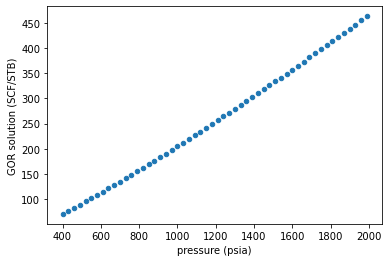

    pressure (psia)  Oil FVF (bbl/STB)
0               400           1.123926
1               430           1.126901
2               460           1.129926
3               490           1.132998
4               520           1.136115
5               550           1.139277
6               580           1.142482
7               610           1.145729
8               640           1.149016
9               670           1.152343
10              700           1.155709
11              730           1.159113
12              760           1.162554
13              790           1.166032
14              820           1.169545
15              850           1.173094
16              880           1.176676
17              910           1.180293
18              940           1.183943
19              970           1.187626
20             1000           1.191341
21             1030           1.195088
22             1060           1.198866
23             1090           1.202675
24             1120      

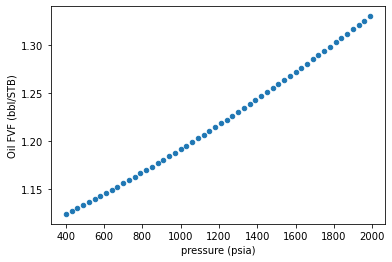

    pressure (psia)  Gas-Oil Interfacial Tension (dynes/cm)
0               400                               18.362247
1               430                               18.026844
2               460                               17.704080
3               490                               17.392699
4               520                               17.091636
5               550                               16.799983
6               580                               16.516955
7               610                               16.241869
8               640                               15.974129
9               670                               15.713206
10              700                               15.458633
11              730                               15.209992
12              760                               14.966911
13              790                               14.729052
14              820                               14.496110
15              850                     

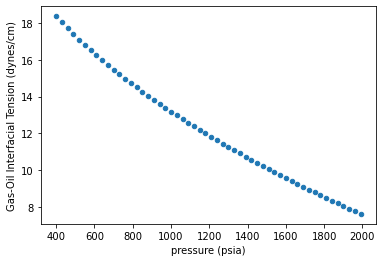

    pressure (psia)  Oil Viscosity (cP)
0               400            0.956263
1               430            0.948041
2               460            0.939824
3               490            0.931621
4               520            0.923437
5               550            0.915279
6               580            0.907153
7               610            0.899062
8               640            0.891011
9               670            0.883005
10              700            0.875045
11              730            0.867136
12              760            0.859280
13              790            0.851479
14              820            0.843735
15              850            0.836051
16              880            0.828427
17              910            0.820866
18              940            0.813368
19              970            0.805935
20             1000            0.798567
21             1030            0.791265
22             1060            0.784031
23             1090            0.776864


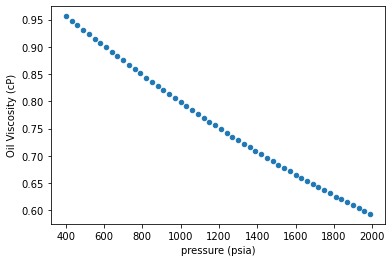

In [39]:
#Input data
api_oil = 35
gamma_oil = 141.5/(131.5 + api_oil)
gamma_gas = 0.861
y1_GORsolution=list()
y2_OilFVF=list()
y3_OG_IFT=list()
y4_oilvisc=list()
x_pressure=list()
temp_ave=236.87
for p in range(400,1996,30):
    pres_ave = p
    GORsolution_value=gor_solution(pres_ave, temp_ave, api_oil)
    OilFVF_value=fvf_oil(temp_ave, gamma_gas, gamma_oil)
    OG_IFT_value=ift_og(pres_ave, api_oil)
    oilvisc_value=visc_oil(temp_ave, api_oil)
    y1_GORsolution.append(GORsolution_value)
    y2_OilFVF.append(OilFVF_value)
    y3_OG_IFT.append(OG_IFT_value)
    y4_oilvisc.append(oilvisc_value)
    x_pressure.append(p)

data_gor_solution = {
      "pressure (psia)": x_pressure,
      "GOR solution (SCF/STB)":y1_GORsolution
    }

df_gorsolution = pd.DataFrame(data_gor_solution)

print(df_gorsolution)
df_gorsolution.plot(kind='scatter',x='pressure (psia)',y='GOR solution (SCF/STB)')
plt.show()

data_fvf_oil = {
      "pressure (psia)": x_pressure,
      "Oil FVF (bbl/STB)":y2_OilFVF
    }

df_fvfoil = pd.DataFrame(data_fvf_oil)

print(df_fvfoil)
df_fvfoil.plot(kind='scatter',x='pressure (psia)',y='Oil FVF (bbl/STB)')
plt.show()

data_ift_og = {
      "pressure (psia)": x_pressure,
      "Gas-Oil Interfacial Tension (dynes/cm)":y3_OG_IFT
    }

df_iftog = pd.DataFrame(data_ift_og)

print(df_iftog)
df_iftog.plot(kind='scatter',x='pressure (psia)',y='Gas-Oil Interfacial Tension (dynes/cm)')
plt.show()

data_visc_oil = {
      "pressure (psia)": x_pressure,
      "Oil Viscosity (cP)":y4_oilvisc
    }

df_viscoil = pd.DataFrame(data_visc_oil)

print(df_viscoil)
df_viscoil.plot(kind='scatter',x='pressure (psia)',y='Oil Viscosity (cP)')
plt.show()

# Flow Model

### 4. In-situ flow rates and velocity calculations

#### 4.1 In-Situ Liquid and Gas Flow Rates at the Tubing Segmen

In [40]:
# Oil rate (cu ft/s)
def rate_oil(oil_rate_sc):
    rate_oil = oil_rate_sc * fvf_oil(temp_ave, gamma_gas, gamma_oil) * (5.6145/86400)
    return rate_oil

# Gas rate (cu ft/s)
def rate_gas(gas_rate_sc):
    rate_gas = (gas_rate_sc - (rate_oil(oil_rate_sc) * gor_solution(pres_ave, temp_ave, api_oil))) * fvf_gas(temp_ave, pres_ave, gamma_gas) * (1/86400)
    return rate_gas

# Water rate (cu ft/s)
def rate_wat(wat_rate_sc, fvf_wat):
    rate_wat = wat_rate_sc * fvf_wat * (5.6145/86400)
    return rate_wat

In [41]:
# Liquid rate (cu ft/s)
def rate_liq():
    rate_liq = rate_oil(oil_rate_sc) + rate_wat(wat_rate_sc, fvf_wat)
    return rate_liq

### 4.2 In-Situ Liquid Density and Interfacial Tension

In [42]:
# Oil fraction
def frac_oil():
    frac_oil = rate_oil(oil_rate_sc) / rate_liq()
    return frac_oil

# Water fraction
def frac_wat():
    frac_wat = rate_wat(wat_rate_sc, fvf_wat) / rate_liq()
    return frac_wat

In [43]:
# Liquid Density (lbm/cu ft)
def dens_liq():
    dens_liq = dens_oil(gamma_gas, gamma_oil) * frac_oil() + 62.4 * frac_wat()
    return dens_liq

# Liquid Viscosity (cP)
def visc_liq():
    visc_liq = visc_oil(temp_ave, api_oil) * frac_oil() + 1 * frac_wat()
    return visc_liq

In [44]:
# Liquid-gas interfacial tension (dynes/cm)
def ift_lg():
    ift_lg = frac_oil() * ift_og(pres_ave, api_oil) + frac_wat() * 1
    return ift_lg

### 4.3 In-Situ Superficial, Actual, Mixture, and Slip Velocities at the Tubing Segment

In [45]:
# Liquid superficial velocity (ft/s)
def vel_sfl_liq(tube_id):
    area = math.pi*((tube_id/2)**2)/144
    vel_sfl_liq = rate_liq()/area
    return vel_sfl_liq

# Gas superficial velocity (ft/s)
def vel_sfl_gas(tube_id):
    area = math.pi*((tube_id/2)**2)/144
    vel_sfl_gas = rate_gas(gas_rate_sc)/area
    return vel_sfl_gas

In [46]:
# Mix of superficial velocity (ft/s)
def vel_mix():
    vel_mix = vel_sfl_liq(tube_id) + vel_sfl_gas(tube_id)
    return vel_mix

In [47]:
# Liquid no slip holdup
def holdup_ns_liq():
    holdup_ns_liq = rate_liq()/(rate_liq()+rate_gas(gas_rate_sc))
    return holdup_ns_liq

# Gas no slip holdup
def holdup_ns_gas():
    holdup_ns_gas = 1-holdup_ns_liq()
    return holdup_ns_gas

## 5. Two-Phase Flow Correlations
### 5.1 Flow Model A: The Hagedorn and Brown Method

In [48]:
# Dimensionless Numbers:

# Liquid velocity number
def num_vl():
    num_vl = 1.938 * vel_sfl_liq(tube_id) * ((dens_liq()/ift_lg()) ** (1/4))
    return num_vl

# Gas velocity number
def num_vg():
    num_vg = 1.938 * vel_sfl_gas(tube_id) * ((dens_liq()/ift_lg()) ** (1/4))
    return num_vg

# Pipe diameter number
def num_pd(tube_id):
    num_pd = 120.872 * (tube_id/12) * ((dens_liq()/ift_lg()) ** (1/2))
    return num_pd

# Liquid viscosity number
def num_vics():
    num_vics = 0.15726 * visc_liq() * ((1 / (dens_liq() * (ift_lg()**3))) ** (1/4))
    return num_vics

### 5.1.2 The Liquid Holdup yL

In [49]:
# The Liquid Holdup
def holdup_liq(pres_ave):
    X3 = (num_vg() * (num_vics() ** 0.38)) / (num_pd(tube_id) ** 2.14)

    if X3 <= 0.01:
        sigma = 1
    else:
        sigma = 0.91163 - 4.82176*X3 + 1232.25*(X3**2) - 22253.6*(X3**3) + 116174.3*(X3**4)

    X1 = math.log10(num_vics()+3)
    Y = -2.69851 + 0.15841*X1 - 0.551*(X1**2) + 0.54785*(X1**3) - 0.12195*(X1**4)
    cnl = 10 ** Y
    pa = 14.7
    X2 = (num_vl() * (pres_ave**(-0.1)) * cnl) / ((num_vg() ** 0.575) * (pa**0.1) * num_pd(tube_id))
    value_holdup_liq = sigma * (-0.10307 + (0.61777*(math.log10(X2)+6)) - (0.63295*((math.log10(X2)+6)**2)) + (0.29598*((math.log10(X2)+6)**3)) - (0.0401*((math.log10(X2)+6)**4)))
    return value_holdup_liq

In [50]:
#Actual velocities (calculated after liquid holdup defined)
def vel_actual_liq():
    vel_actual_liq = vel_sfl_liq(tube_id)/holdup_liq(pres_ave)
    return vel_actual_liq

def vel_actual_gas():
    holdup_gas = 1-holdup_liq(pres_ave)
    vel_actual_gas = vel_sfl_gas(tube_id)/holdup_gas
    return vel_actual_gas

In [51]:
#Slip velocity
def vel_slip():
    vel_slip = vel_actual_gas() - vel_actual_liq()
    return vel_slip

### 5.1.3 The Friction Factor Ftp

In [52]:
# The Friction Factor
def friction_tp(tube_id, pres_ave, gamma_gas, temp_ave, roughness):
    dens_gas = 2.6988 * pres_ave * gamma_gas / (temp_ave * z_factor(temp_ave, pres_ave, gamma_gas))
    dens_ns = ((1 - holdup_ns_liq()) * dens_gas) + (holdup_ns_liq() * dens_liq())
    num_re = 1488 * (((tube_id/12) * vel_mix() * dens_ns)/((visc_liq() ** holdup_liq(pres_ave)) * (visc_gas(temp_ave, pres_ave, gamma_gas) ** (1 - holdup_liq(pres_ave)))))
    friction = 1 / ((1.14 - (2 * math.log10((roughness/12) / (tube_id/12) + (21.25 / (num_re ** 0.9))))) ** 2)
    value_friction_tp = friction / 4
    return value_friction_tp

### 5.1.4 The Total Pressure gradient (psi/ft)

In [53]:
# The Total Pressure Gradient
def grad_pres_tot(pres_ave, gamma_gas, temp_ave, tube_id):
    dens_gas = 2.6988 * pres_ave * gamma_gas / (temp_ave * z_factor(temp_ave, pres_ave, gamma_gas))
    dens_ns = ((1 - holdup_ns_liq()) * dens_gas) + (holdup_ns_liq() * dens_liq())
    dens_holdup = ((1 - holdup_liq(pres_ave)) * dens_gas) + (holdup_liq(pres_ave) * dens_liq())
    value_grad_pres_tot = (1/144) * ((dens_holdup * (math.sin((90)*math.pi/180))) + ((2 * friction_tp(tube_id, pres_ave, gamma_gas, temp_ave, roughness) * ((dens_ns**2)/dens_holdup)*(vel_mix()**2)) / (33.29*(tube_id/12))))
    return value_grad_pres_tot

### Test functions

In [54]:
#input data
# wellbore conditions
tube_id = 2.441
roughness = 0.001
Pwh = 400
Pwf = 1996
pres_ave = (Pwh + Pwf)/2
temp_ave = 236.87

# fluid properties
api_oil = 35
gamma_oil = 141.5/(131.5 + api_oil)
gamma_gas = 0.861

# flow rate
GOR = 1500
oil_rate_sc = 1800
gas_rate_sc = GOR * oil_rate_sc
wat_rate_sc = 0
fvf_wat = 0

liq_holdup = holdup_liq(pres_ave)
print("The Liquid Holdup ---", liq_holdup) 
friction_factor = friction_tp(tube_id, pres_ave, gamma_gas, temp_ave, roughness)
print("The Friction Factor --- " , friction_factor)
total_pressure_gradient = grad_pres_tot(pres_ave, gamma_gas, temp_ave, tube_id)
print("The Total Pressure Gradient --- " , total_pressure_gradient, "psi/ft")

The Liquid Holdup --- 0.17386468786495957
The Friction Factor ---  0.00406567935012706
The Total Pressure Gradient ---  0.19729689158357958 psi/ft


### 5.1.5 The Pressure Drop in Segment ∆𝑳 (psi)

    Pressure (psia)  Depth (ft)
0       1972.968916       10000
1       1941.509538        9800
2       1910.050159        9600
3       1878.590781        9400
4       1847.131403        9200
5       1815.672024        9000
6       1784.212646        8800
7       1752.753268        8600
8       1721.293889        8400
9       1689.834511        8200
10      1658.375133        8000
11      1626.915754        7800
12      1595.456376        7600
13      1563.996998        7400
14      1532.537619        7200
15      1501.078241        7000
16      1469.618863        6800
17      1438.159484        6600
18      1406.700106        6400
19      1375.240728        6200
20      1343.781350        6000
21      1312.321971        5800
22      1280.862593        5600
23      1249.403215        5400
24      1217.943836        5200
25      1186.484458        5000
26      1155.025080        4800
27      1123.565701        4600
28      1092.106323        4400
29      1060.646945        4200
30      

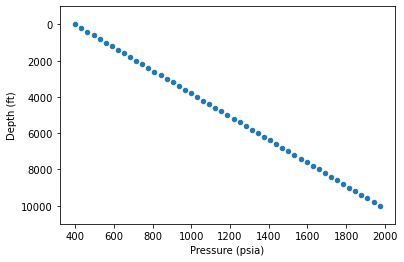

In [55]:
# Pressure in each segment
Pwh = 400
depth = 10000
y_depth=list()
x_pressure=list()
for L in range(10000,-200,-200):
    length = L
    press_segment = grad_pres_tot(pres_ave, gamma_gas, temp_ave, tube_id) * length + Pwh * ((depth - length)/depth)
    y_depth.append(L)
    x_pressure.append(press_segment)

data_press_segment = {
      "Pressure (psia)": x_pressure,
      "Depth (ft)":y_depth
    }

df_pr_seg = pd.DataFrame(data_press_segment)

print(df_pr_seg)
df_pr_seg.plot(kind='scatter',x='Pressure (psia)',y='Depth (ft)')
plt.ylim(11000,-1000)
plt.show()

## Conclusion
### After definig the pressure gradient as 0.1973 psi/ft and testing pressure traverse (Depth vs Pressure), we can certainly state fluid correlations and flow models are operates properly.
### Here is difference between calculated and give pressure traverse:

#### Calculated: 
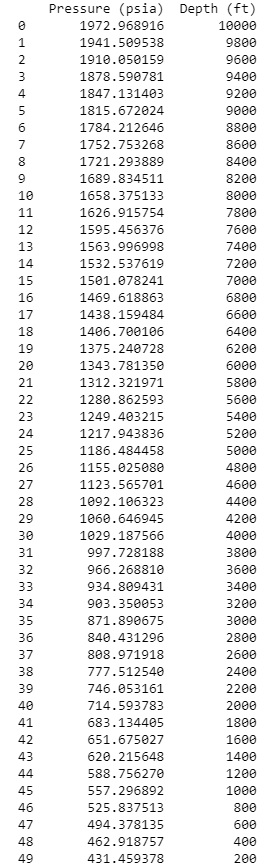

#### Given data:
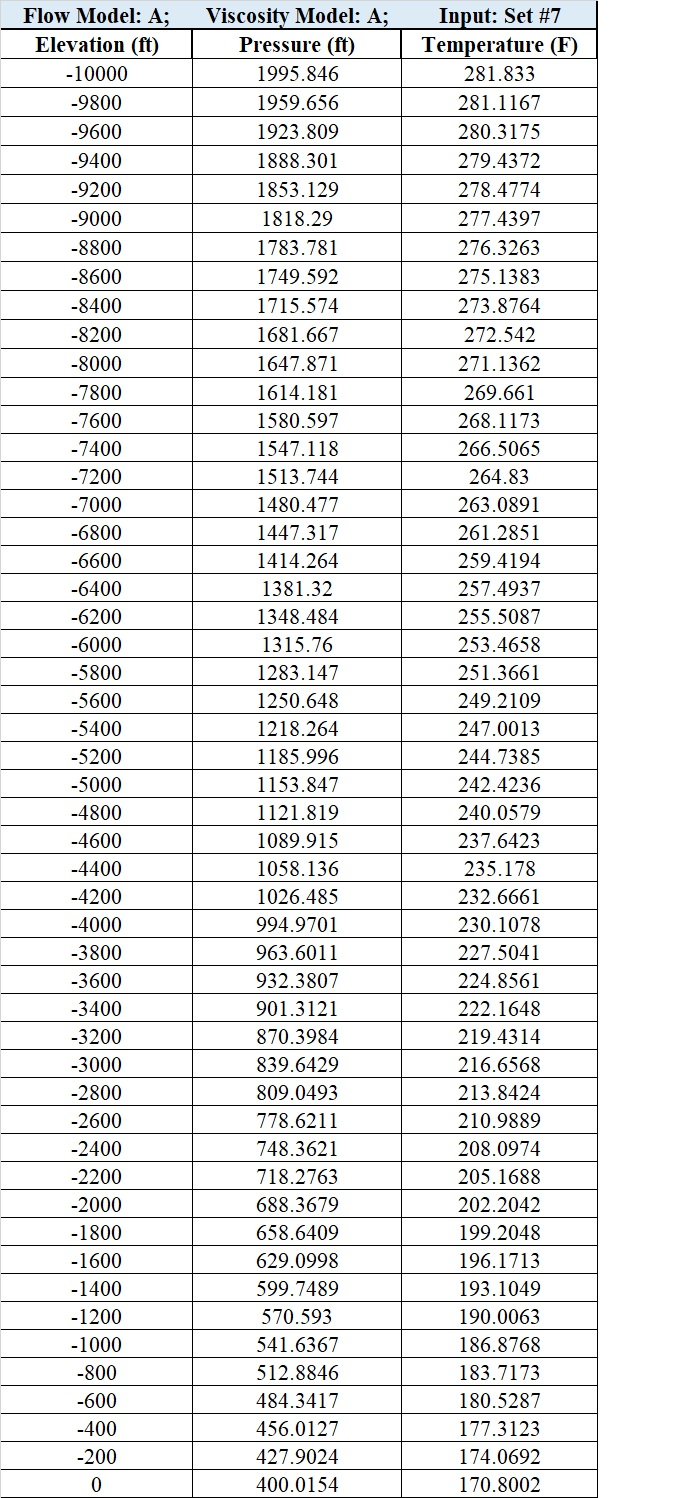